# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Asma Kamilah Nur Jawahir]
- **Email:** [asmaknj@student.ub.ac.id]
- **ID Dicoding:** [asmaknj]

## Menentukan Pertanyaan Bisnis

- Bagaimana perkembangan penyewa sepeda tiap hari dan tiap bulan?
- Apa faktor yang memengaruhi jumlah penyewa sepeda?

## Import Semua Packages/Library yang Digunakan

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/naskaj/Proyek-AnalisisData/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [61]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/naskaj/Proyek-AnalisisData/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [4]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Mengecek missing value dan duplicate data di `day_df`

In [5]:
print(day_df.isna().sum())
print("Jumlah duplikasi: ", day_df.duplicated().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [62]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Mengecek missing value dan duplicate data di `hour_df`

In [63]:
print(hour_df.isna().sum())
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah duplikasi:  0


In [64]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Memperbaiki tipe data `day_df` dan `hour_df`

In [7]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [8]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [65]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [66]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [9]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
686,687,2012-11-17,4,1,11,0,6,0,1,0.325000,0.326383,0.545417,0.179729,1313,4316,5629
392,393,2012-01-28,1,1,1,0,6,0,1,0.315833,0.326379,0.543333,0.210829,775,3248,4023
160,161,2011-06-10,2,0,6,0,5,1,1,0.755000,0.703292,0.605000,0.140554,815,3771,4586
22,23,2011-01-23,1,0,1,0,0,0,1,0.096522,0.098839,0.436522,0.246600,150,836,986
305,306,2011-11-02,4,0,11,0,3,1,1,0.377500,0.390133,0.718750,0.082092,370,3816,4186


In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Melihat perbandingan banyaknya penyewaan sepeda pada hari kerja dan hari libur.

In [67]:
day_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


Melihat perbandingan banyaknya penyewaan sepeda tiap-tiap cuaca.

In [68]:
day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
weathersit,,
1,446346,1811606
2,169776,827082
3,3895,33974


Melihat perbandingan banyaknya penyewaan sepeda berdasarkan hari dan cuaca.

In [69]:
day_df.groupby(by=["workingday", "weathersit"]).agg({
    "casual": "sum",
    "registered": "sum"
})

casual  registered
workingday weathersit                    
0          1           231469      484145
           2            83509      192069
           3             1754        7323
1          1           214877     1327461
           2            86267      635013
           3             2141       26651

#### Explore `hour_df`

In [70]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
6404,6405,2011-09-29,4,0,9,10,0,4,1,1,0.64,0.6061,0.65,0.1940,24,103,127
2666,2667,2011-04-26,2,0,4,0,0,2,1,1,0.62,0.6061,0.69,0.2836,10,17,27
1825,1826,2011-03-21,2,0,3,19,0,1,1,1,0.58,0.5455,0.60,0.4179,22,199,221
11465,11466,2012-04-27,2,1,4,22,0,5,1,1,0.42,0.4242,0.38,0.2537,24,134,158
12655,12656,2012-06-16,2,1,6,12,0,6,0,1,0.68,0.6364,0.41,0.1045,254,349,603


In [71]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Melihat jumlah penyewa tiap hari baik terdaftar maupun tidak.

In [72]:
hour_df.groupby(by="dteday").agg({
    "casual": "sum",
    "registered": "sum"
})

,casual,registered
dteday,,
2011-01-01,331,654
2011-01-02,131,670
2011-01-03,120,1229
2011-01-04,108,1454
2011-01-05,82,1518
...,...,...
2012-12-27,247,1867
2012-12-28,644,2451
2012-12-29,159,1182


Membuat file baru berisi data yang sudah bersih.

In [73]:
day_df.to_csv("main_data.csv", index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [76]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
monthly_df.index = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df.head(12)

,dteday,casual,registered,cnt
0,January,3073,35116,38189
1,February,6242,41973,48215
2,March,12826,51219,64045
3,April,22346,72524,94870
4,May,31050,104771,135821
5,June,30612,112900,143512
6,July,36452,104889,141341
7,August,28842,107849,136691
8,September,26545,100873,127418
9,October,25222,98289,123511


In [77]:
firstyear_df = monthly_df.head(12)

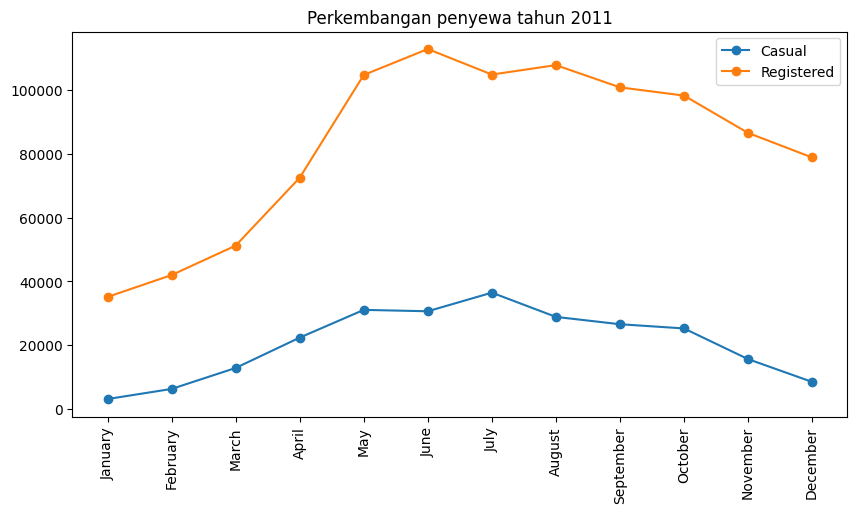

In [78]:
plt.figure(figsize=(10, 5))
x = firstyear_df["dteday"]
y1 = firstyear_df["casual"]
y2 = firstyear_df["registered"]

plt.plot(x, y1, marker='o')
plt.plot(x, y2, marker='o')
plt.xticks(x, rotation=90)
plt.title("Perkembangan penyewa tahun 2011", loc="center")
plt.legend(["Casual", "Registered"])
plt.show()

In [79]:
monthly_df = day_df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
monthly_df.index = monthly_df.index.strftime('%B')
monthly_df = monthly_df.reset_index()
monthly_df.tail(12)

,dteday,casual,registered,cnt
12,January,8969,87775,96744
13,February,8721,94416,103137
14,March,31618,133257,164875
15,April,38456,135768,174224
16,May,44235,151630,195865
17,June,43294,159536,202830
18,July,41705,161902,203607
19,August,43197,171306,214503
20,September,43778,174795,218573
21,October,34538,164303,198841


In [80]:
scndyear_df = monthly_df.tail(12)

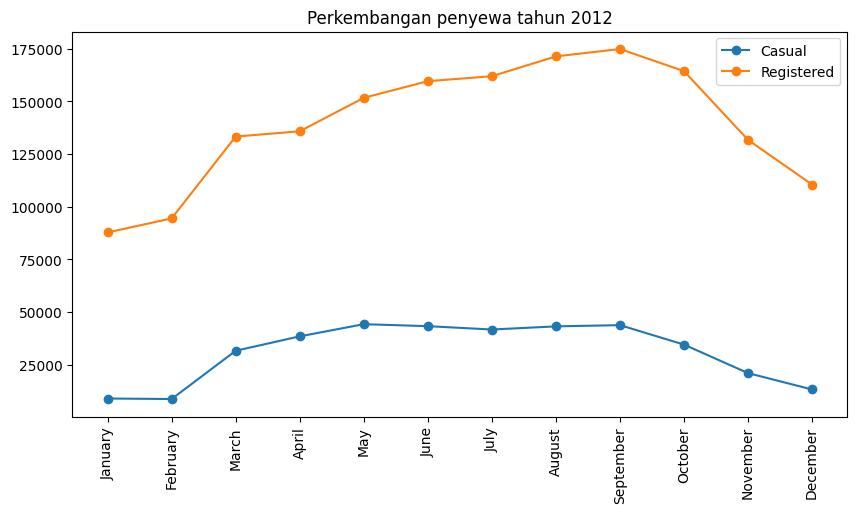

In [81]:
plt.figure(figsize=(10, 5))
x = scndyear_df["dteday"]
y1 = scndyear_df["casual"]
y2 = scndyear_df["registered"]

plt.plot(x, y1, marker='o')
plt.plot(x, y2, marker='o')
plt.xticks(x, rotation=90)
plt.title("Perkembangan penyewa tahun 2012", loc="center")
plt.legend(["Casual", "Registered"])
plt.show()

In [82]:
monthly_df = day_df.resample(rule='Y', on='dteday').agg({
    "cnt": "sum"
})
monthly_df.index = monthly_df.index.strftime('%Y')
monthly_df = monthly_df.sort_values(by="cnt", ascending=False).reset_index()
monthly_df

,dteday,cnt
0,2012,2049576
1,2011,1243103


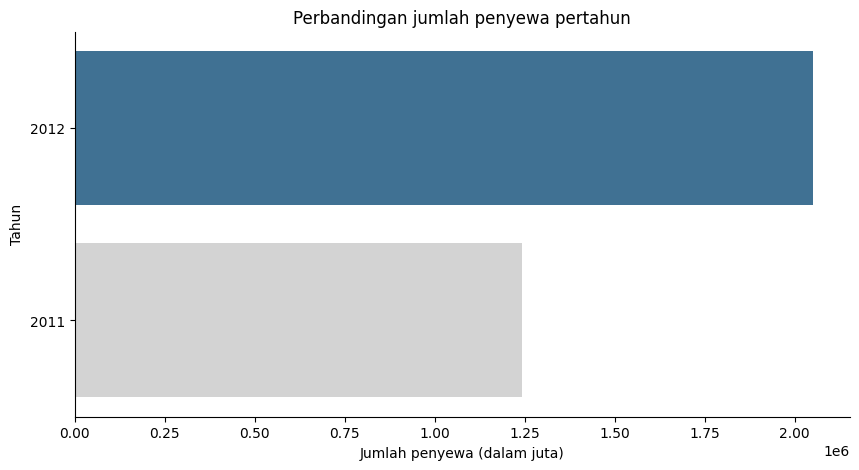

In [83]:
f, ax = plt.subplots(figsize=(10, 5))
colors = ["#3274A1", "#D3D3D3"]
sns.despine(f)
sns.barplot(x=monthly_df['cnt'], y=monthly_df['dteday'], orient='h', hue=colors, palette=colors, legend=False)

plt.title("Perbandingan jumlah penyewa pertahun", loc="center")
plt.ylabel("Tahun")
plt.xlabel("Jumlah penyewa (dalam juta)")
plt.show()

### Pertanyaan 2:

In [84]:
byday_df = day_df.groupby(by="workingday").agg({
    "casual": "sum",
    "registered": "sum"
})

byday_df

,casual,registered
workingday,,
0,316732,683537
1,303285,1989125


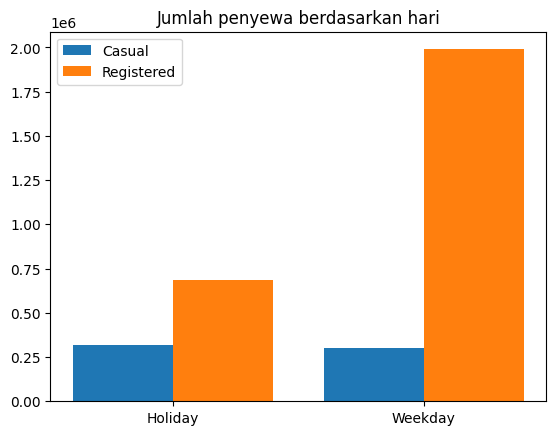

In [85]:
x = np.arange(2)
y1 = byday_df['casual']
y2 = byday_df['registered']
width = 0.40
  
plt.title("Jumlah penyewa berdasarkan hari", loc="center")
plt.xticks(x, ['Holiday', 'Weekday'])
plt.bar(x-width/2, y1, width)
plt.bar(x+width/2, y2, width)
plt.legend(["Casual", "Registered"])

In [86]:
byweather_df = day_df.groupby(by="weathersit").agg({
    "casual": "sum",
    "registered": "sum"
})

byweather_df

,casual,registered
weathersit,,
1,446346,1811606
2,169776,827082
3,3895,33974


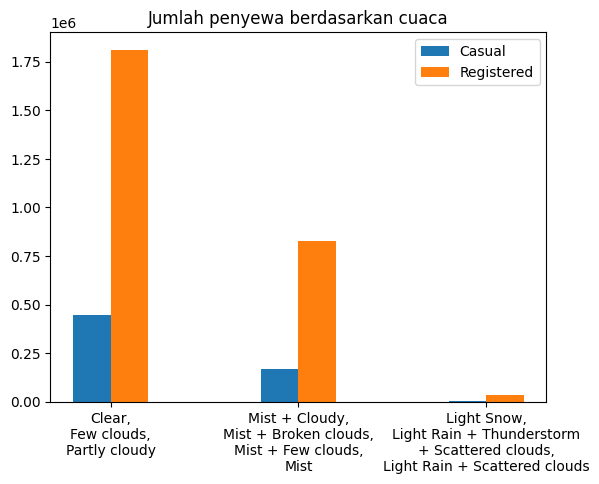

In [87]:
x = np.arange(3)
y1 = byweather_df['casual']
y2 = byweather_df['registered']
width = 0.20

plt.title("Jumlah penyewa berdasarkan cuaca", loc="center")
plt.xticks(x, ["Clear,\nFew clouds,\nPartly cloudy",
                "Mist + Cloudy,\nMist + Broken clouds,\nMist + Few clouds,\nMist",
                "Light Snow,\nLight Rain + Thunderstorm\n+ Scattered clouds,\nLight Rain + Scattered clouds"])

plt.bar(x-width/2, y1, width)
plt.bar(x+width/2, y2, width)
plt.legend(["Casual", "Registered"])

## Conclusion

- Dari grafik yang telah ditampilkan, dapat disimpulkan bahwa jumlah penyewa sepeda mengalami kenaikan mulai bulan Maret dan mengalami penurunan di bulan September. Total penyewa pertahun pun naik sebesar 64%.
- Dari grafik yang telah ditampilkan, dapat disimpulkan bahwa jumlah penyewa sepeda pada hari kerja memiliki nilai yang lebih tinggi daripada hari libur, terutama penyewa yang telah terdaftar. Kemudian, jumlah penyewa sepeda berdasarkan cuaca memiliki nilai yang lebih tinggi di kategori 1 (Clear, Few clouds, Partly cloudy). Hal ini berarti jenis hari dan cuaca memengaruhi penyewa untuk menyewa sepeda.